In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\madas\Downloads\Diwali_Sales_Data.csv",encoding = 'unicode_escape')
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [3]:
df.drop(['Status','unnamed1'],axis = 1,inplace = True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [5]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


### Data cleaning

### Missing values

In [6]:
df.isna().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [7]:
import warnings 
warnings.filterwarnings('ignore')

In [8]:
df['Amount'].fillna(method = 'ffill',inplace = True)

In [9]:
df.isna().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

### duplicates

In [10]:
df.duplicated().sum()

8

In [11]:
df.drop_duplicates(keep = 'first',inplace = True)

In [12]:
df.duplicated().sum()

0

In [13]:
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0


### univariate Analysis

In [14]:
df.dtypes

User_ID               int64
Cust_name            object
Product_ID           object
Gender               object
Age Group            object
Age                   int64
Marital_Status        int64
State                object
Zone                 object
Occupation           object
Product_Category     object
Orders                int64
Amount              float64
dtype: object

### Numerical

<Axes: title={'center': 'Histogram of Amount'}, xlabel='Amount', ylabel='Frequency'>

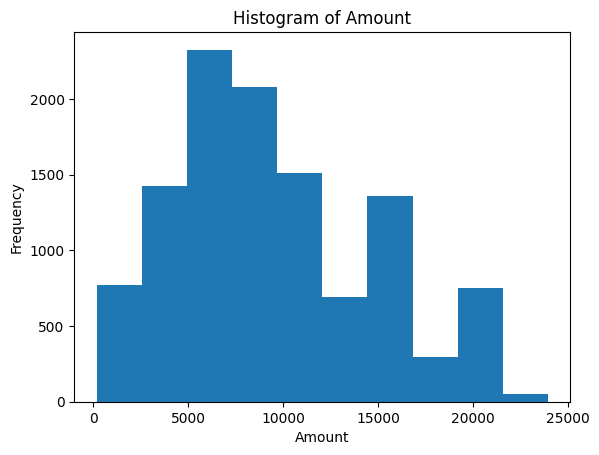

In [15]:
#Histogram
df['Amount'].plot(kind = 'hist',title = 'Histogram of Amount',xlabel = 'Amount')

+ The histogram plot shows the distribution of sales Amount from the minimum to the maximum.
+ Most frequent sales Amount are between 5000 to 10000.
+ Least frequent sales Amount are above 21000 to 23000 and beyond.

<Axes: title={'center': 'Density of Marital_Status'}, ylabel='Density'>

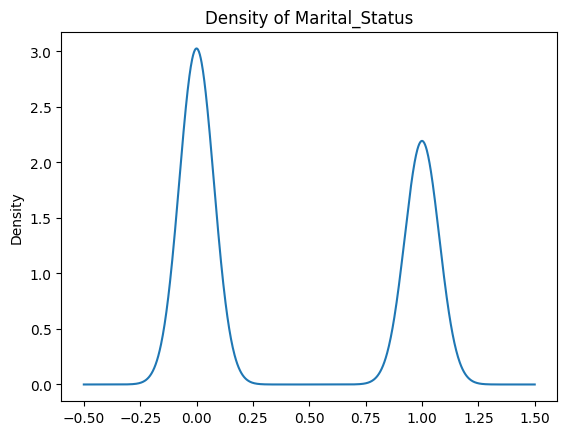

In [16]:
#Density plot
df['Marital_Status'].plot(kind = 'density',title = 'Density of Marital_Status',xlabel = 'Marital_Status')

+ The Density plot shows the distribution of Marital_Status from the minimum to the maximum.
+ As we can see, the curve is bell shaped curve so the data points are following the normal distribution.
+ The y-axis is labeled from 0 to 73, representing density values.
+ There are some points on the plot. These points could represent specific values or outliers in the data.

<Axes: title={'center': 'Boxplot of Age'}>

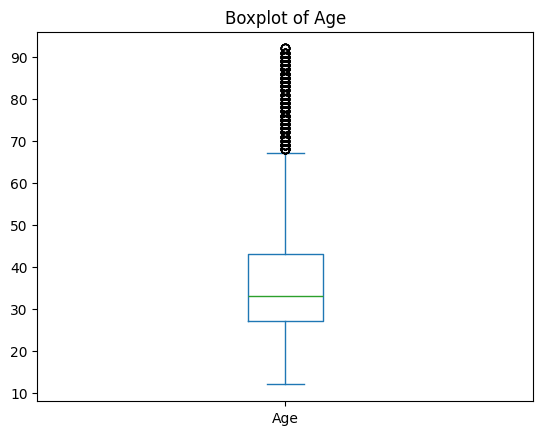

In [36]:
#Box plot
df['Age'].plot(kind = 'box',title = 'Boxplot of Age')

+ The boxplot shows the distribution of ages ranging from the 0 to 100.
+ From boxplot all the values are true values as per the dataset so the values can not be replaced or removed.
+ The observation states that there are some outliers in the age column. Outliers are data points that significantly differ from the rest of the dataset.

<Axes: xlabel='Age', ylabel='Density'>

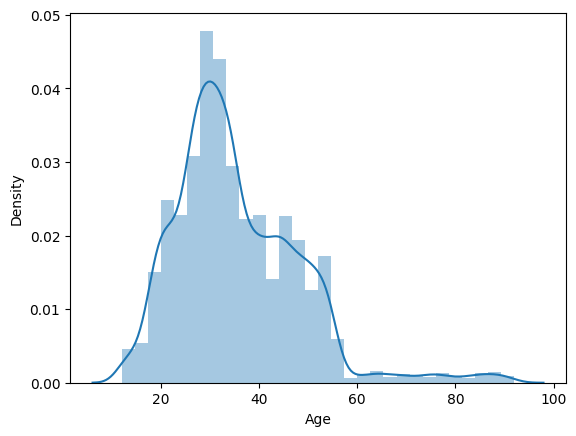

In [38]:
#distplot
sns.distplot(df['Age'],bins = 30)

+ It appears that two plots are combined in the distplot.
+ The Distplot shows the distribution of ages ranging from the 0 to 100.
+ As we can see, the curve is Not bell shaped curve so the data points are Not following the normal distribution.
+ The y-axis is labeled from 0.00 to 0.05, representing the distribution plot values.
+ The observation mentions that the age group around 30 has a higher frequency, indicating that more people fall into this age category.

<Axes: xlabel='Amount'>

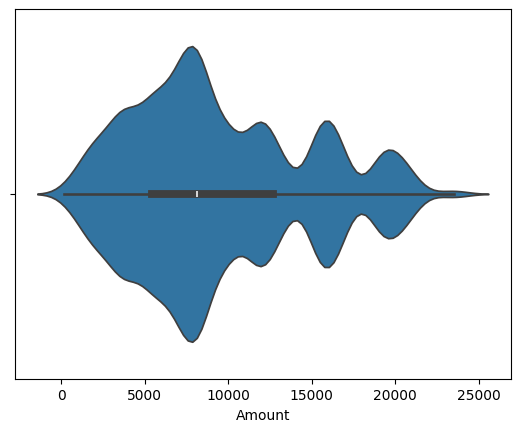

In [39]:
#violinplot
sns.violinplot(data =df,x ='Amount')

+ It appears that two plots are combined in the violinplot.
+ The violinplot shows the distribution of sales Amount from the minimum to the maximum.
+ The observation states that there are no outliers in the Sales Amount column. Outliers are data points that significantly differ from the rest of the dataset.

### Categorical

<Axes: title={'center': 'Barplot of Gender'}, xlabel='Gender'>

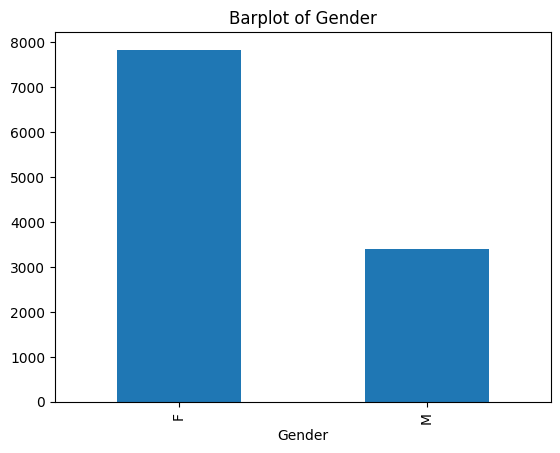

In [18]:
#barplot
df['Gender'].value_counts().plot(kind = 'bar',title = 'Barplot of Gender',xlabel = 'Gender')

+ The barplot illustrates the distribution of gender, specifically for males and females.
+ The observation mentions that females have a higher population compared to males. 
+ This implies that there are more female individuals represented in the dataset than male individuals.

<Axes: title={'center': 'piechart of Occupation'}, ylabel='count'>

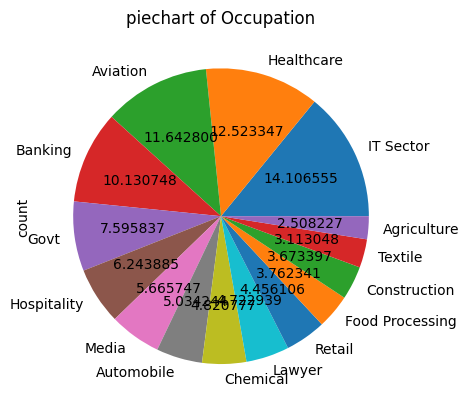

In [40]:
df['Occupation'].value_counts().plot(kind = 'pie',title = 'piechart of Occupation',autopct = "%1f")

+ The piechart visualizes the distribution of various Occupations.
+ The observation mentions that the "Healthcare" has a high percentage of the data, indicating a significant presence of this Occupations in the dataset.
+ The observation also notes that the "Agriculture " has a low percentage of the data, suggesting a smaller representation of this Occupations.
+ Additionally, it's mentioned that the "Avitation " has the second-highest percentage among the departments.

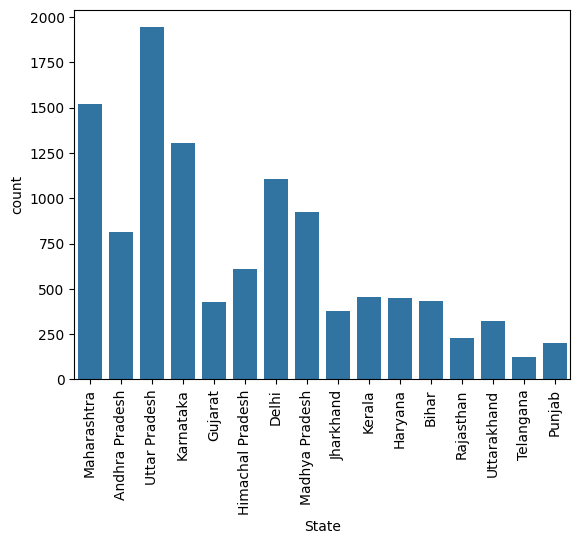

In [20]:
sns.countplot(data = df, x = 'State')
plt.xticks(rotation = 90)
plt.show()

+ The countplot visualizes the distribution of different states.
+ The observation notes that the "Uttar pradesh" state has a higher sales compared to other states. 
+ The observation also mentions that the "Telangana" state has a lower sales compared to other sates.

### Bivariate Analysis

### categorical & categoriacl

In [21]:
df.dtypes

User_ID               int64
Cust_name            object
Product_ID           object
Gender               object
Age Group            object
Age                   int64
Marital_Status        int64
State                object
Zone                 object
Occupation           object
Product_Category     object
Orders                int64
Amount              float64
dtype: object

In [22]:
def mar(n):
    if n == 0:
        return 'Unmarried'
    else:
        return "married"

In [23]:
df['Marital_Status'] = df['Marital_Status'] .apply(mar)

In [24]:
#CROSSTAB
pd.crosstab(index= df['Gender'],columns = df['Marital_Status'],margins = True)

Marital_Status,Unmarried,married,All
Gender,,,
F,4575,3263,7838
M,1943,1462,3405
All,6518,4725,11243


<Axes: xlabel='Gender', ylabel='count'>

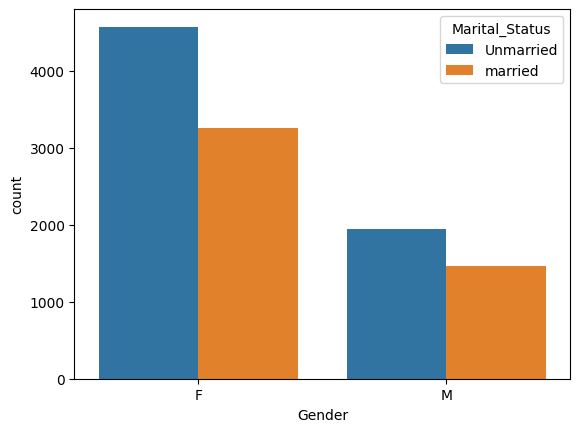

In [25]:
sns.countplot(data = df,x = 'Gender',hue = 'Marital_Status')

+ The countplot illustrates the distribution of individuals based on both gender and marital status.
+ Different colors are used to represent different marital statuses: blue for unmarried, orange for Married.
+ The observation mentions that females have a higher population compared to males.
+ This implies that there are more female individuals represented in the dataset than male individuals.

### categorical & Numerical

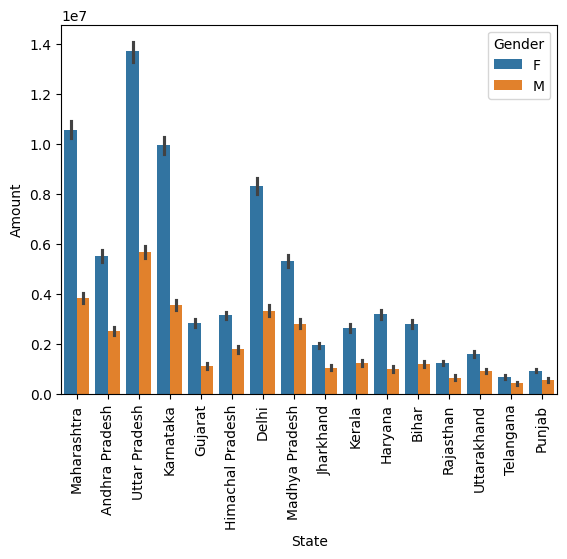

In [26]:
#barplot
sns.barplot(data = df,y = 'Amount',x = 'State',hue = 'Gender',estimator = 'sum')
plt.xticks(rotation = 90)
plt.show()

+ The bar plot illustrates the distribution of Amount across various states.
+ The observation notes that individuals in uttar pradesh has most sales. 
+ Conversely, the Telangana is mentioned to have least sales


In [27]:
#groupby
df.groupby(by = 'Cust_name')['Age'].agg(np.mean)

Cust_name
Aaron       40.000000
Aarushi     40.714286
Aastha      26.222222
Aayush      39.142857
Aayushi     42.875000
              ...    
Zuschuss    39.333333
Zydlo       50.714286
Zypern      22.300000
liebe       28.125000
percer      47.857143
Name: Age, Length: 1250, dtype: float64

In [28]:
df.pivot_table(index = 'Gender',values = 'Amount',columns = 'Marital_Status',aggfunc = 'mean',margins = True)

Marital_Status,Unmarried,married,All
Gender,,,
F,9583.015615,9400.816424,9507.165148
M,9439.301595,9285.012312,9373.054626
All,9540.174814,9364.984548,9466.549091


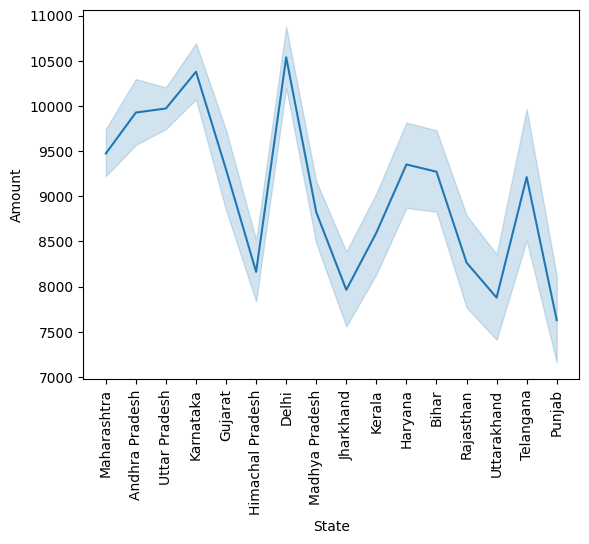

In [29]:
#lineplot
sns.lineplot(data = df,x = 'State',y = 'Amount')
plt.xticks(rotation = 90)
plt.show()

+ The line chart illustrates the sales Amount of individuals states.

### Numerical &  Numerical 

<Axes: xlabel='Amount', ylabel='Age'>

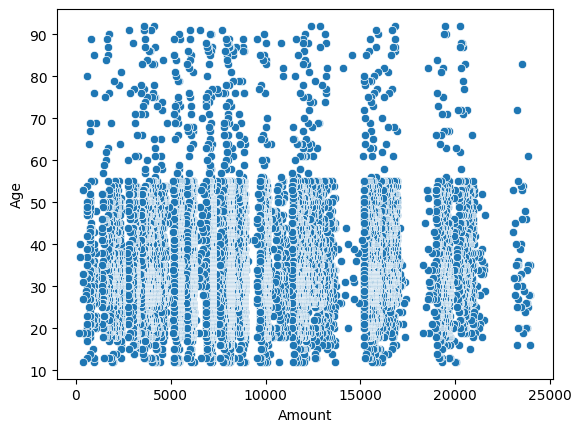

In [30]:
#scatter plot
sns.scatterplot(data = df,x ='Amount',y = 'Age' )

In [31]:
#correlation
df.corr(numeric_only = True)

,User_ID,Age,Orders,Amount
User_ID,1.000000,0.022581,-0.016220,-0.010691
Age,0.022581,1.000000,0.008033,0.032344
Orders,-0.016220,0.008033,1.000000,-0.013295
Amount,-0.010691,0.032344,-0.013295,1.000000


In [32]:
df[['Age','Amount']].corr()

,Age,Amount
Age,1.000000,0.032344
Amount,0.032344,1.000000


### Multivarite Analysis

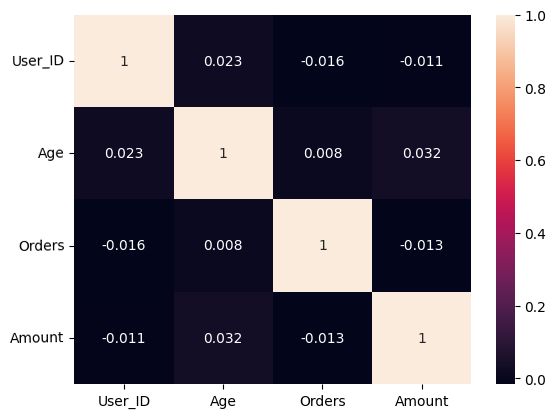

In [33]:
#heatmap
sns.heatmap(df.corr(numeric_only = True),annot = True)
plt.yticks(rotation = 1)
plt.show()

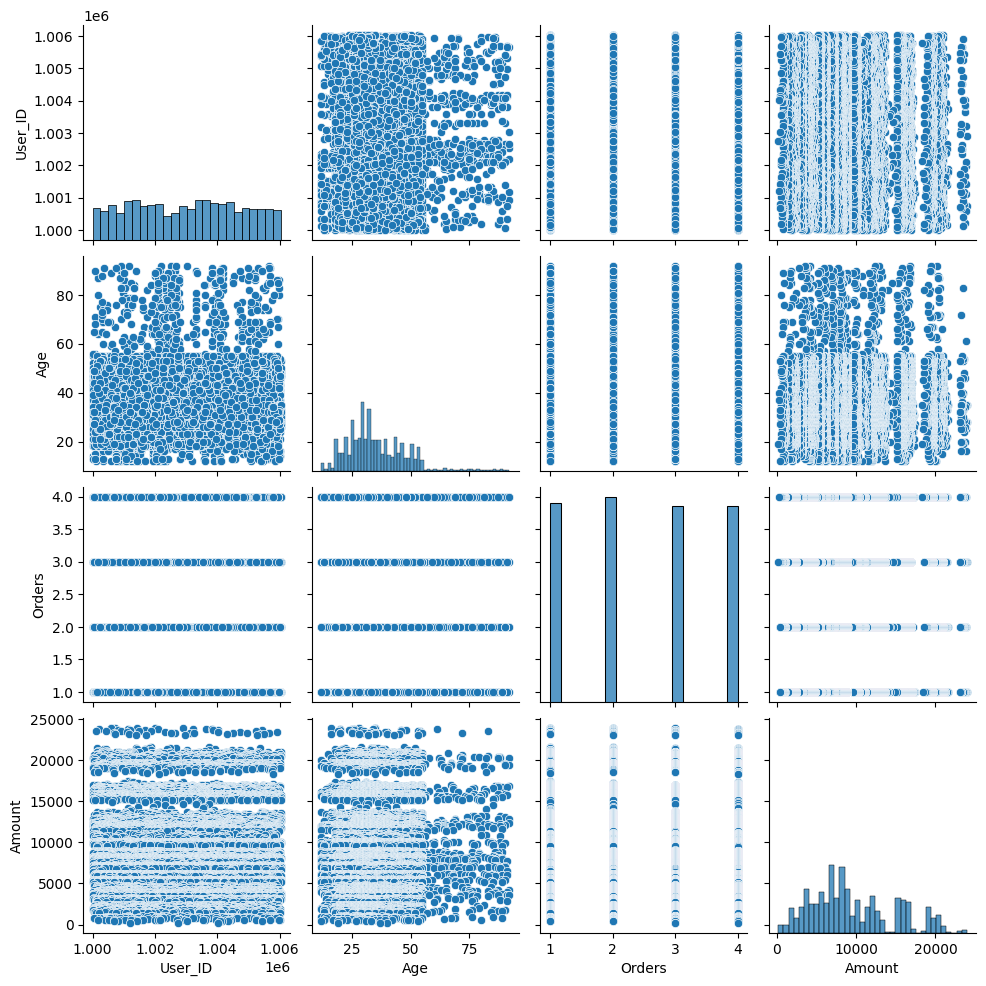

In [34]:
#pairplot
sns.pairplot(data = df)